# Set Membership

The cell below defines two **abstract classes**: the first represents a set and basic insert/search operations on it. You will need to impement this API four times, to implement (1) sequential search, (2) binary search tree, (3) balanced search tree, and (4) bloom filter. The second defines the synthetic data generator you will need to implement as part of your experimental framework. <br><br>**Do NOT modify the next cell** - use the dedicated cells further below for your implementation instead. <br>

In [10]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  

# abstract class to represent a set and its insert/search operations
class AbstractSet(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # inserts "element" in the set
    # returns "True" after successful insertion, "False" if the element is already in the set
    # element : str
    # inserted : bool
    @abstractmethod
    def insertElement(self, element):     
        inserted = False
        return inserted   
    
    # checks whether "element" is in the set
    # returns "True" if it is, "False" otherwise
    # element : str
    # found : bool
    @abstractmethod
    def searchElement(self, element):
        found = False
        return found    
    
    
    
# abstract class to represent a synthetic data generator
class AbstractTestDataGenerator(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # creates and returns a list of length "size" of strings
    # size : int
    # data : list<str>
    @abstractmethod
    def generateData(self, size):     
        data = [""]*size
        return data   


Use the cell below to define any auxiliary data structure and python function you may need. Leave the implementation of the main API to the next code cells instead.

In [11]:
# ADD AUXILIARY DATA STRUCTURE DEFINITIONS AND HELPER CODE HERE

class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class RB_Node(Node):
    RED = True
    BLACK = False

    def __init__(self, value, colour):
        super().__init__(value)
        self.colour = colour

Use the cell below to implement the requested API by means of **sequential search**.

In [12]:
class SequentialSearchSet(AbstractSet):
    def __init__(self):
        self.set = []      
     
    def insertElement(self, element):
        if self.searchElement(element) is False:
            self.set.append(element)
            return True
        return False
    
    def searchElement(self, element):
        for member in self.set:
            if member == element:
                return True
        return False

Use the cell below to implement the requested API by means of **binary search tree**.

In [13]:
class BinarySearchTreeSet(AbstractSet):
    def __init__(self):
        self.root = None
    
    def insertElement(self, element):
        if not self.root:
            self.root = Node(element)
            return True
        else:
            current = self.root
            while current:
                if current.value == element:
                    return False
                elif current.value > element:
                    if not current.left:
                        current.left = Node(element)
                        return True
                    current = current.left
                elif current.value < element:
                    if not current.right:
                        current.right = Node(element)
                        return True
                    current = current.right
        return False

    def searchElement(self, element):
        current = self.root
        while current:
            if current.value == element:
                return True
            elif current.value > element:
                current = current.left
            elif current.value < element:
                current = current.right
        return False


Use the cell below to implement the requested API by means of **balanced search tree**.

In [14]:
class BalancedSearchTreeSet(AbstractSet):
    def __init__(self):
        self.root = None

    @staticmethod
    def is_red(node):
        if node is None:
            return False
        return node.colour == RB_Node.RED

    @staticmethod
    def rotate_left(node):
        x = node.right
        node.right = x.left
        x.left = node
        x.colour = node.colour
        node.colour = RB_Node.RED
        return x

    @staticmethod
    def rotate_right(node):
        x = node.left
        node.left = x.right
        x.right = node
        x.colour = node.colour
        node.colour = RB_Node.RED
        return x

    @staticmethod
    def flip_colours(node):
        node.colour = RB_Node.RED
        node.left.colour = RB_Node.BLACK
        node.right.colour = RB_Node.BLACK
    
    def insertElement(self, element):
        self.root, inserted = self._insertElement(self.root, element)
        self.root.colour = RB_Node.BLACK
        return inserted
    
    def _insertElement(self, node, element):
        if node is None:
            return RB_Node(element, RB_Node.RED), True

        if element < node.value:
            node.left, inserted = self._insertElement(node.left, element)
        elif element > node.value:
            node.right, inserted = self._insertElement(node.right, element)
        else:
            return node, False
        
        if self.is_red(node.right) and not self.is_red(node.left):
            node = self.rotate_left(node)
        if self.is_red(node.left) and self.is_red(node.left.left):
            node = self.rotate_right(node)
        if self.is_red(node.left) and self.is_red(node.right):
            self.flip_colours(node)
        return node, inserted    

    def searchElement(self, element):     
        return self._searchElement(self.root, element) == element

    def _searchElement(self, node, element):
        if node is None:
            return False

        if element < node.value:
            return self._searchElement(node.left, element)
        elif element > node.value:
            return self._searchElement(node.right, element)
        else:
            return node.value   

Use the cell below to implement the requested API by means of **bloom filter**.

In [15]:
from bitarray import bitarray

EXPECTED_NUM_INSERTIONS = 500000
BITARRAY_SIZE = EXPECTED_NUM_INSERTIONS * 50
LN2 = 0.69314718056

class BloomFilterSet(AbstractSet):
    def __init__(self, size, num_hashes=3):
        self.size = size
        self.num_hashes = num_hashes
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)

    def _hash(self, element):
        hash_values = []
        for i in range(self.num_hashes):
            hash_value = hash(f'{element}{i}')
            hash_values.append(hash_value % self.size)
        return hash_values
    
    @staticmethod
    def optimise_k(m, n):
        return 1 + int(LN2 * (m / n))
        
    def insertElement(self, element):
        if self.searchElement(element) is False:
            hash_values = self._hash(element)
            for value in hash_values:
                self.bit_array[value] = 1
            return True
        else:
            return False
    
    def searchElement(self, element):     
        hash_values = self._hash(element)
        for value in hash_values:
            if not self.bit_array[value]:
                return False
        return True

Use the cell below to implement the **synthetic data generator** as part of your experimental framework.

In [16]:
import string
import random

class TestDataGenerator(AbstractTestDataGenerator):
    NUM_WORDS = 50000
    MIN_LENGTH = 1
    AV_LOW_LENGTH = 2
    AV_HIGH_LENGTH = 6
    MAX_LENGTH = 12
    CONSONANTS = 'bcdfghjklmnpqrstvwxyz'
    VOWELS = 'aeiou'
    test_file = "synthetic_test_search.txt"
    SAMPLE_INTERVAL = 200
    test_words = set()

    def __init__(self):
        pass

    def generate_word(self, scarcity=0.05):
        limit = int(1 / scarcity)
        roulette = random.randint(0, int(1 / scarcity))
        if roulette == limit:
            length = random.randint(self.AV_LOW_LENGTH, self.AV_HIGH_LENGTH)
        else:
            length = random.randint(self.MIN_LENGTH, self.MAX_LENGTH)
        word = ''
        for i in range(length):
            if i % 2 == 1 or length == 1:
                word += random.choice(self.VOWELS)
            else:
                word += random.choice(self.CONSONANTS)
        return word

    # Generate the words and put them in an array + create a test file
    def generateData(self, size):
        data = []
        for i in range(size):
            word = self.generate_word()
            data.append(word)
            if i % self.SAMPLE_INTERVAL == 0:
                self.test_words.add(word)
                self.test_words.add(self.generate_word())

        test_words = list(self.test_words)
        with open(self.test_file, 'w') as f:
            for i in range(len(test_words)):
                f.write(test_words[i])
                if i <= len(test_words):
                    f.write('\n')

        return data



Use the cells below for the python code needed to **fully evaluate your implementations**, first on real data and subsequently on synthetic data (i.e., read data from test files / generate synthetic one, instantiate each of the 4 set implementations in turn, then thorouhgly experiment with insert/search operations and measure their performance).

In [17]:
 # ADD YOUR TEST CODE HERE TO WORK ON REAL DATA
import timeit
import random
import string

HASH_KEYS = 5

@staticmethod
def txt_to_list(file_path):
    with open(file_path, 'r') as f:
        content = f.read()
        if (file_path == "test-search.txt") or (file_path == "synthetic_test_search.txt"):
            return content.split("\n")
        else:
            return content.split()

class ExperimentalFramework:
    def __init__(self, data_file, data_structures_dict, operation_repeats=50, search_intervals=5, search_test_file="test-search.txt"):
        self.data_values = txt_to_list(data_file)
        self.search_words = txt_to_list(search_test_file)
        self.data_structures_dict = data_structures_dict
        self.operation_repeats = operation_repeats
        self.intervals = len(self.data_values) // search_intervals
        self.insert_time = {}
        self.mean_search_time = {}

    def calc_insert_search_time_multiple_data_structures(self):
        for data_structure_name, data_structure in self.data_structures_dict.items():
            print(data_structure_name)
            self.calc_insert_search_time_one_data_structure(data_structure_name, data_structure)

    def calc_insert_search_time_one_data_structure(self, data_structure_name, data_structure):
        self.insert_time[data_structure_name] = {}
        self.mean_search_time[data_structure_name] = {}

        for i, word in enumerate(self.data_values):
            self.insert_time[data_structure_name][i] = timeit.timeit(lambda: data_structure.insertElement(word), number=self.operation_repeats)

            if i % self.intervals == 0:
                # Executes the search function in specified intervals for the data structure over the elements already input
                search_time = [timeit.timeit(lambda: data_structure.searchElement(word), number=self.operation_repeats) for word in self.search_words]
                self.mean_search_time[data_structure_name][i] = sum(search_time) / (self.operation_repeats * len(search_time))
        print(f"Mean Search Time - {self.mean_search_time}")

    def get_insert_search_time_one_data_structure(self):
        return self.calc_insert_search_time_one_data_structure(list(data_structures_dict)[0], list(data_structures_dict.values())[0])


class RunTests(ExperimentalFramework):

    def __init__(self, data_file, data_structures_dict, operation_repeats=50, search_intervals=5, search_test_file="test-search.txt"):
        super().__init__(data_file, data_structures_dict, operation_repeats, search_intervals, search_test_file)

    def sorted_real_data(self):
        self.data_values = sorted(self.data_values)
        self.calc_insert_search_time_multiple_data_structures()

    def no_repeats_real_data(self):
        self.data_values = set(self.data_values)
        print(self.data_values)
        self.calc_insert_search_time_multiple_data_structures()

    def normal_real_data(self):
        self.calc_insert_search_time_multiple_data_structures()

if __name__ == '__main__':
    data_structures_dict = {"BST": BinarySearchTreeSet()}
    test = RunTests("test1-mobydick.txt", data_structures_dict, 1, 10)
    test.normal_real_data()

BST
Mean Search Time - {'BST': {0: 1.9941295266424845e-06, 20932: 1.8746237838726252e-05, 41864: 1.9175228833673742e-05, 62796: 2.0535232247186637e-05, 83728: 1.7100917132690958e-05, 104660: 1.9261100513159957e-05, 125592: 2.0448074018189667e-05, 146524: 2.0313028613566804e-05, 167456: 2.956477083573374e-05, 188388: 1.839614545909363e-05, 209320: 1.6743485354433912e-05}}


In [18]:
# ADD YOUR TEST CODE HERE TO WORK ON SYNTHETIC DATA
import timeit

NUM_SYNTHETIC = 100000
HASH_KEYS = 5

def list_to_txt(list):
    with open("synthetic_data.txt", "w") as file:
        for value in list:
            file.write(value)
            file.write('\n')

class SyntheticData(ExperimentalFramework):
    def __init__(self, data_structures_dict, operation_repeats=50, search_intervals=5):
        self.data_values = TestDataGenerator().generateData(NUM_SYNTHETIC)
        list_to_txt(self.data_values)
        self.data_file = "synthetic_data.txt"
        self.search_test_file = "synthetic_test_search.txt"
        super().__init__(self.data_file, data_structures_dict, operation_repeats, search_intervals, self.search_test_file)

    def get_results(self):
        self.calc_insert_search_time_multiple_data_structures()

if __name__ == '__main__':
    data_structures_dict = {"BF": BloomFilterSet(BITARRAY_SIZE, HASH_KEYS)}
    test_synthetic = SyntheticData(data_structures_dict, 10, 10)
    test_synthetic.get_results()




BF
Mean Search Time - {'BF': {0: 1.3995078657858409e-05, 10000: 1.1574404531294543e-05, 20000: 1.1742516915219721e-05, 30000: 1.2448370781088812e-05, 40000: 1.3638101099582201e-05, 50000: 1.3200910055612245e-05, 60000: 1.3818045073513234e-05, 70000: 1.0688460642587017e-05, 80000: 1.340588762063868e-05, 90000: 1.3557044930463092e-05}}


In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd_insert_time = pd.DataFrame.from_dict(test.insert_time)
pd_search_time = pd.DataFrame.from_dict(test.mean_search_time)

In [20]:
pd_insert_time

,BST
0,0.000008
1,0.000004
2,0.000004
3,0.000003
4,0.000005
...,...
209324,0.000016
209325,0.000014
209326,0.000010
209327,0.000005


In [21]:
pd_insert_time_averaged = pd_insert_time.groupby(np.arange(len(pd_insert_time))//200).median()

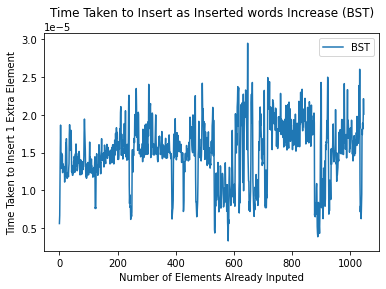

In [22]:
algo = 'BST'
upper_ylim = 0.001
insert_graph = sns.lineplot(data=pd_insert_time_averaged)
insert_graph.set(title=f'Time Taken to Insert as Inserted words Increase ({algo})', xlabel='Number of Elements Already Inputed', ylabel='Time Taken to Insert 1 Extra Element')
plt.show()

In [23]:
pd_search_time

,BST
0,0.000002
20932,0.000019
41864,0.000019
62796,0.000021
83728,0.000017
104660,0.000019
125592,0.000020
146524,0.000020
167456,0.000030
188388,0.000018


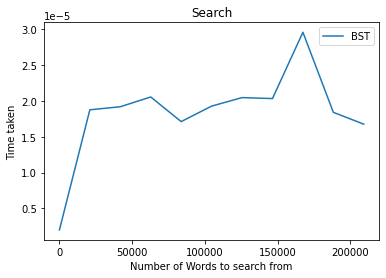

In [24]:
search_graph = sns.lineplot(data=pd_search_time)
search_graph.set(title='Search', xlabel='Number of Words to search from', ylabel='Time taken')
plt.show()